In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

In [20]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

In [21]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

In [22]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
val_cats_dir = os.path.join(val_dir,'cats')
val_dogs_dir = os.path.join(val_dir,'dogs')

In [23]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))
total_tr = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print(total_tr,total_val)

2000 1000


In [24]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [47]:
def plot_image(images_arr):
    image,axes = plt.subplots(1,5,figsize=(20,20))
    axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

image_gen_tr = ImageDataGenerator(rescale = 1.0/255,
                              rotation_range=45,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip = True,
                              fill_mode='nearest')

train_data_gen = image_gen_tr.flow_from_directory(batch_size = BATCH_SIZE,
                          shuffle=True,
                          directory=train_dir,
                          target_size=(IMG_SHAPE,IMG_SHAPE))

image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory = val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

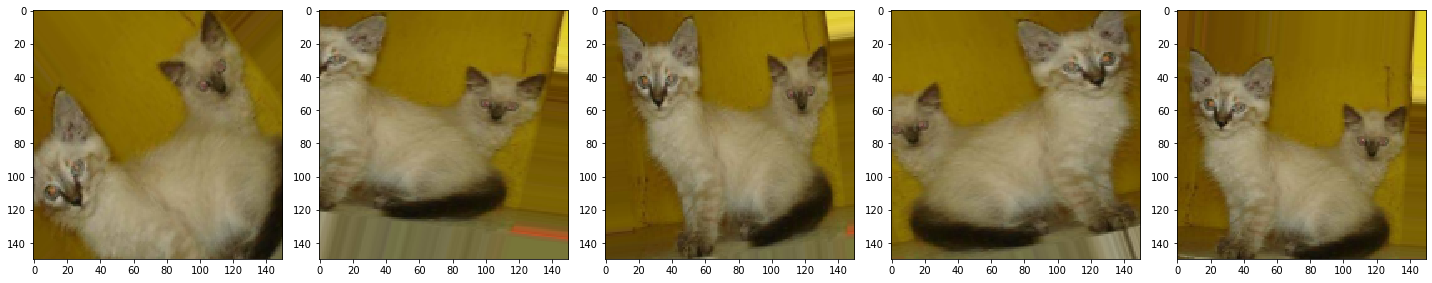

In [46]:
plot_image(aug_images)

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])

In [52]:
model.compile(loss='binary_crossentropy',
             metrics=['accuracy'],
             optimizer='adam')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [55]:
epochs = 1
history = model.fit_generator(train_data_gen,
                             steps_per_epoch = int(np.ceil(total_tr/float(BATCH_SIZE))),
                             epochs=epochs,
                             validation_data = val_data_gen,
                             validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
                             )

ValueError: A target array with shape (100, 2) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.